#1.Introduction

The Walt Disney Company has been around for almost 98 years.Fueled by my love for Disney movies, I attempted to create a dataset of every Walt Disney movies I could find. This projects uses webscrapping to extract required infromation to build the dataset. 

#2.Libraries 



1.   Beautiful Soup
2.   Requests
3.   Pytest




#3.Scraping the Wikipedia page

In [1]:
#list of Disney films
disneyurl = "https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films"

A sample of the Infobox for the movie Soul

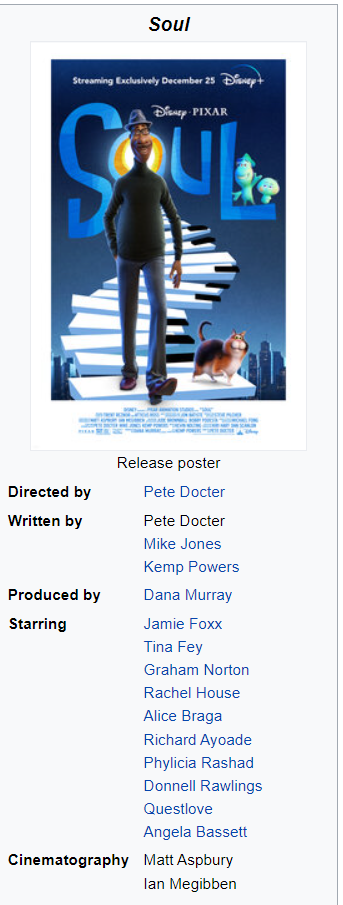

For every movie displayed in the list of Disney movies, scrape the info box to extract relevant information.

##3.1 Trying to scrape the data for Soul

In [2]:
soul_url = "https://en.wikipedia.org/wiki/Soul_(2020_film)"



Taking a closer look at the source code, I was able to narrow down the infobox data to a table class with an id infobox vevenet

"<table class = "infobox vevenet> </table>"

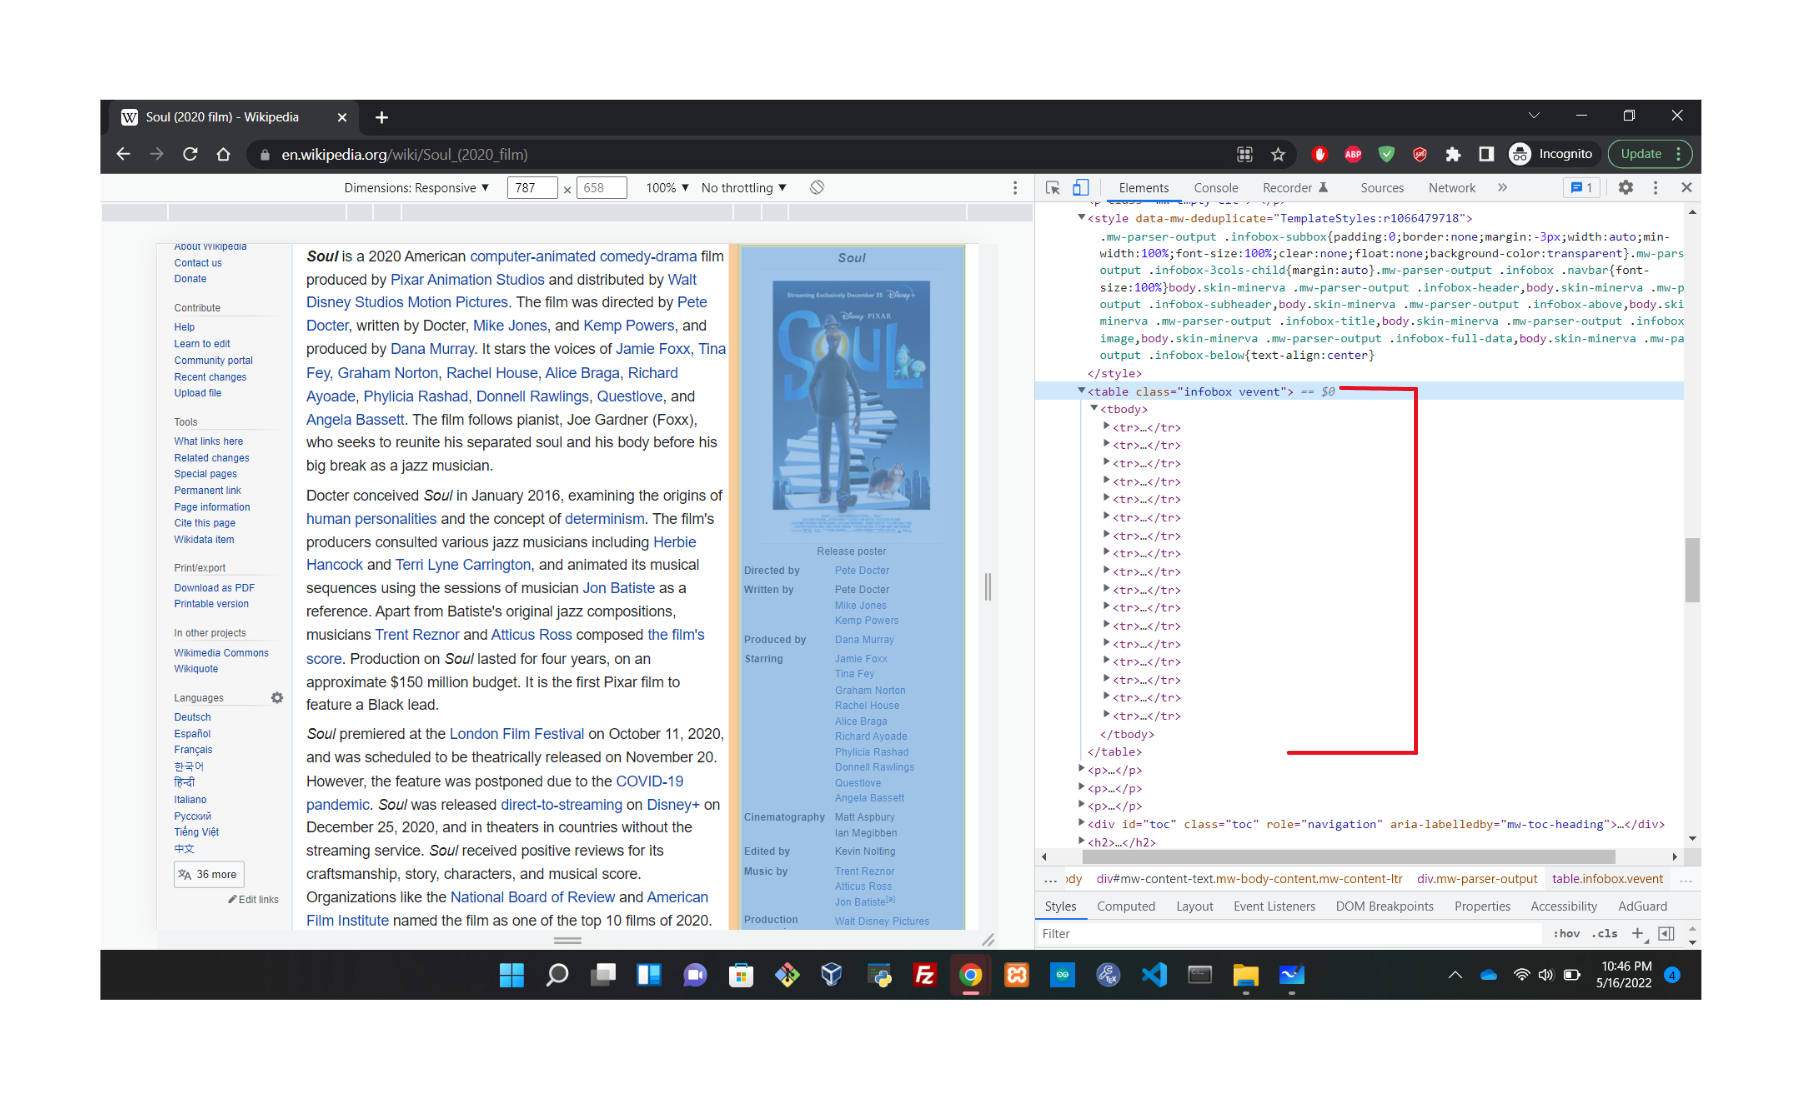

## 3.2 Install dependencies

In [235]:
from bs4 import BeautifulSoup as bs
import requests
import pprint
import json
import yaml


##3.3 Loading the webpage



In [ ]:
page = requests.get(soul_url)


#Converting to a beautiful soup obj
sp = bs(page.content)

data = sp.prettify()

print(data)

#webpage output hidden due to large volume

In [ ]:
soulInfoBox = sp.find(class_="infobox vevent")
print(soulInfoBox.prettify())

#webpage output hidden due to large volume

In [ ]:
#Find all the rows in the soulInfoBox
infoRows = soulInfoBox.find_all("tr")

for row in infoRows:
  print(row.prettify())

#webpage output hidden due to large volume

#4.Extracting Soul data into dictionary

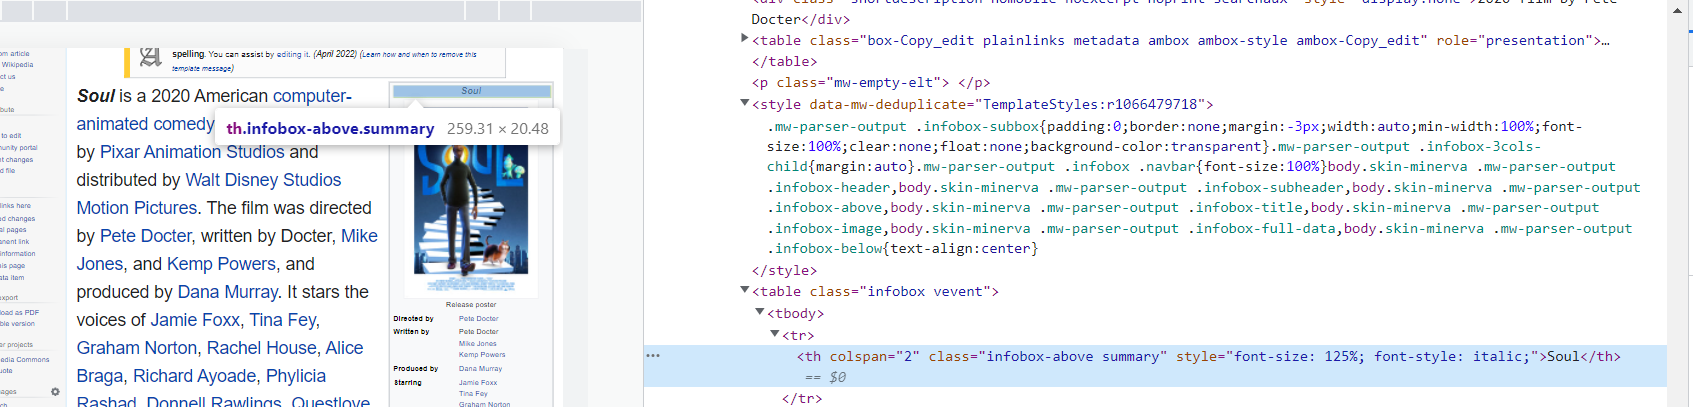

In [ ]:
#Function to check if a row data has a list or not
# added .replace to clean data having weird \xa0 values and strip =True attrib 
# to take care of whitesapces.

#Updated function

def getContentsValue(rowData):
  if rowData.find("li"):
    return [li.get_text(" ", strip =True).replace("\xa0", " ") for li in rowData.find_all("li")]
  else:
    return rowData.get_text(" ", strip = True).replace("\xa0", " ")


# Uncomment this and comment the one above to see the raw data without filter
'''
def getContentsValue(rowData):
  if rowData.find("li"):
    return [li.get_text() for li in rowData.find_all("li")]
  else:
    return rowData.get_text()
'''


In [24]:
'''
    Note: This section was used to see the raw data of the info box without any
          type of clean up. 


          Cell ran without using the udpated getContentsValue function
'''


soulMovieInfo = {}

for idx, row in enumerate(infoRows):

  #First row
  if idx == 0:
    soulMovieInfo['Title'] = row.find("th").get_text()

  #Second row
  elif idx ==1:
    continue # not storing this value in the dictionary

  #Reamining
  else:
    contentsKey = row.find("th").get_text()
    contentsValue = getContentsValue(row.find("td"))
    soulMovieInfo[contentsKey] = contentsValue


#This should print the dictionary with key and values

for key, value in soulMovieInfo.items():
  print(key, ' : ', value)


Title  :  Soul
Directed by  :  ['Pete Docter']
Written by  :  ['Pete Docter', 'Mike Jones', 'Kemp Powers']
Produced by  :  Dana Murray
Starring  :  ['Jamie Foxx', 'Tina Fey', 'Graham Norton', 'Rachel House', 'Alice Braga', 'Richard Ayoade', 'Phylicia Rashad', 'Donnell Rawlings', 'Questlove', 'Angela Bassett']
Cinematography  :  ['Matt Aspbury', 'Ian Megibben']
Edited by  :  Kevin Nolting
Music by  :  ['Trent Reznor', 'Atticus Ross', 'Jon Batiste[a]']
Productioncompanies  :  ['Walt Disney Pictures', 'Pixar Animation Studios']
Distributed by  :  Walt Disney StudiosMotion Pictures
Release dates  :  ['October\xa011,\xa02020\xa0(2020-10-11) (BFI Fest)', 'December\xa025,\xa02020\xa0(2020-12-25) (United States)']
Running time  :  101 minutes
Country  :  United States
Language  :  English
Budget  :  $150 million
Box office  :  $121 million


##4.1 Cleaning data

Looking at the output, we can see that some values need a bit of cleaning. 

Some examples from above:



1.   ProductionCompanies and Walt Disney StudiosMotion Pictures : would be better if two words were separated by a space

 When I examined the source code for the Production Company, I found that the content as:
     "Production"
       < br >
       "Company "

Looking at the documentatio for get_text in beautiful soup, I found that you can specify to strip whitespace. 
 We correct 1 by adding a strip = True attribute to get_text to take care of whitesapces.


2.   Release dates has some weird \xa011 and other values

 We correct 2 by adding python's string replacement function in the getContentsValue function.

Then, the cleaned up output after fixing type 1 and type 2 formatting  is displayed below:

In [42]:
'''
 Cell ran using the udpated getContentsValue function. We can seee that the 
 weired \xa0 characters have been removed and whitespaces have been accounted 
 for

 '''
 

soulMovieInfo = {}

for idx, row in enumerate(infoRows):

  #First row
  if idx == 0:
    soulMovieInfo['Title'] = row.find("th").get_text()

  #Second row
  elif idx ==1:
    continue # not storing this value in the dictionary

  #Remaining
  else:
    contentsKey = row.find("th").get_text()
    contentsValue = getContentsValue(row.find("td"))
    soulMovieInfo[contentsKey] = contentsValue


#This should print the dictionary with key and values

for key, value in soulMovieInfo.items():
  print(key, ' : ', value)


Title  :  Soul
Directed by  :  ['Pete Docter']
Written by  :  ['Pete Docter', 'Mike Jones', 'Kemp Powers']
Produced by  :  Dana Murray
Starring  :  ['Jamie Foxx', 'Tina Fey', 'Graham Norton', 'Rachel House', 'Alice Braga', 'Richard Ayoade', 'Phylicia Rashad', 'Donnell Rawlings', 'Questlove', 'Angela Bassett']
Cinematography  :  ['Matt Aspbury', 'Ian Megibben']
Edited by  :  Kevin Nolting
Music by  :  ['Trent Reznor', 'Atticus Ross', 'Jon Batiste [a]']
Productioncompanies  :  ['Walt Disney Pictures', 'Pixar Animation Studios']
Distributed by  :  Walt Disney Studios Motion Pictures
Release dates  :  ['October 11, 2020 ( 2020-10-11 ) ( BFI Fest )', 'December 25, 2020 ( 2020-12-25 ) (United States)']
Running time  :  101 minutes
Country  :  United States
Language  :  English
Budget  :  $150 million
Box office  :  $121 million


Now, we do the same for every movie 
in the List of Disney Movies. :)

#5.Extracting info box for all movies

We got the infobox for one movie. Moving forward, we do the same for each and every movie present in the list. That is we extract data from the infobox of every movie listed in the main page.

Goal : To build a list of dictionaries, where each dictionary represents the infobox for a specific movie. 

In [ ]:
#list of Disney films
disney_url = "https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films"


pageDisney= requests.get(disney_url)


#Converting to a beautiful soup obj
sp = bs(pageDisney.content)

disneyData = sp.prettify()

print(disneyData)

#webpage output hidden due to large volume

Examining the content of the Released section which dipslays the list of movies, I found  a table class with an id "wikitable sortable jquery-tablesorter" class which housed the information. Each table has threee columns with title, relase date, and notes.

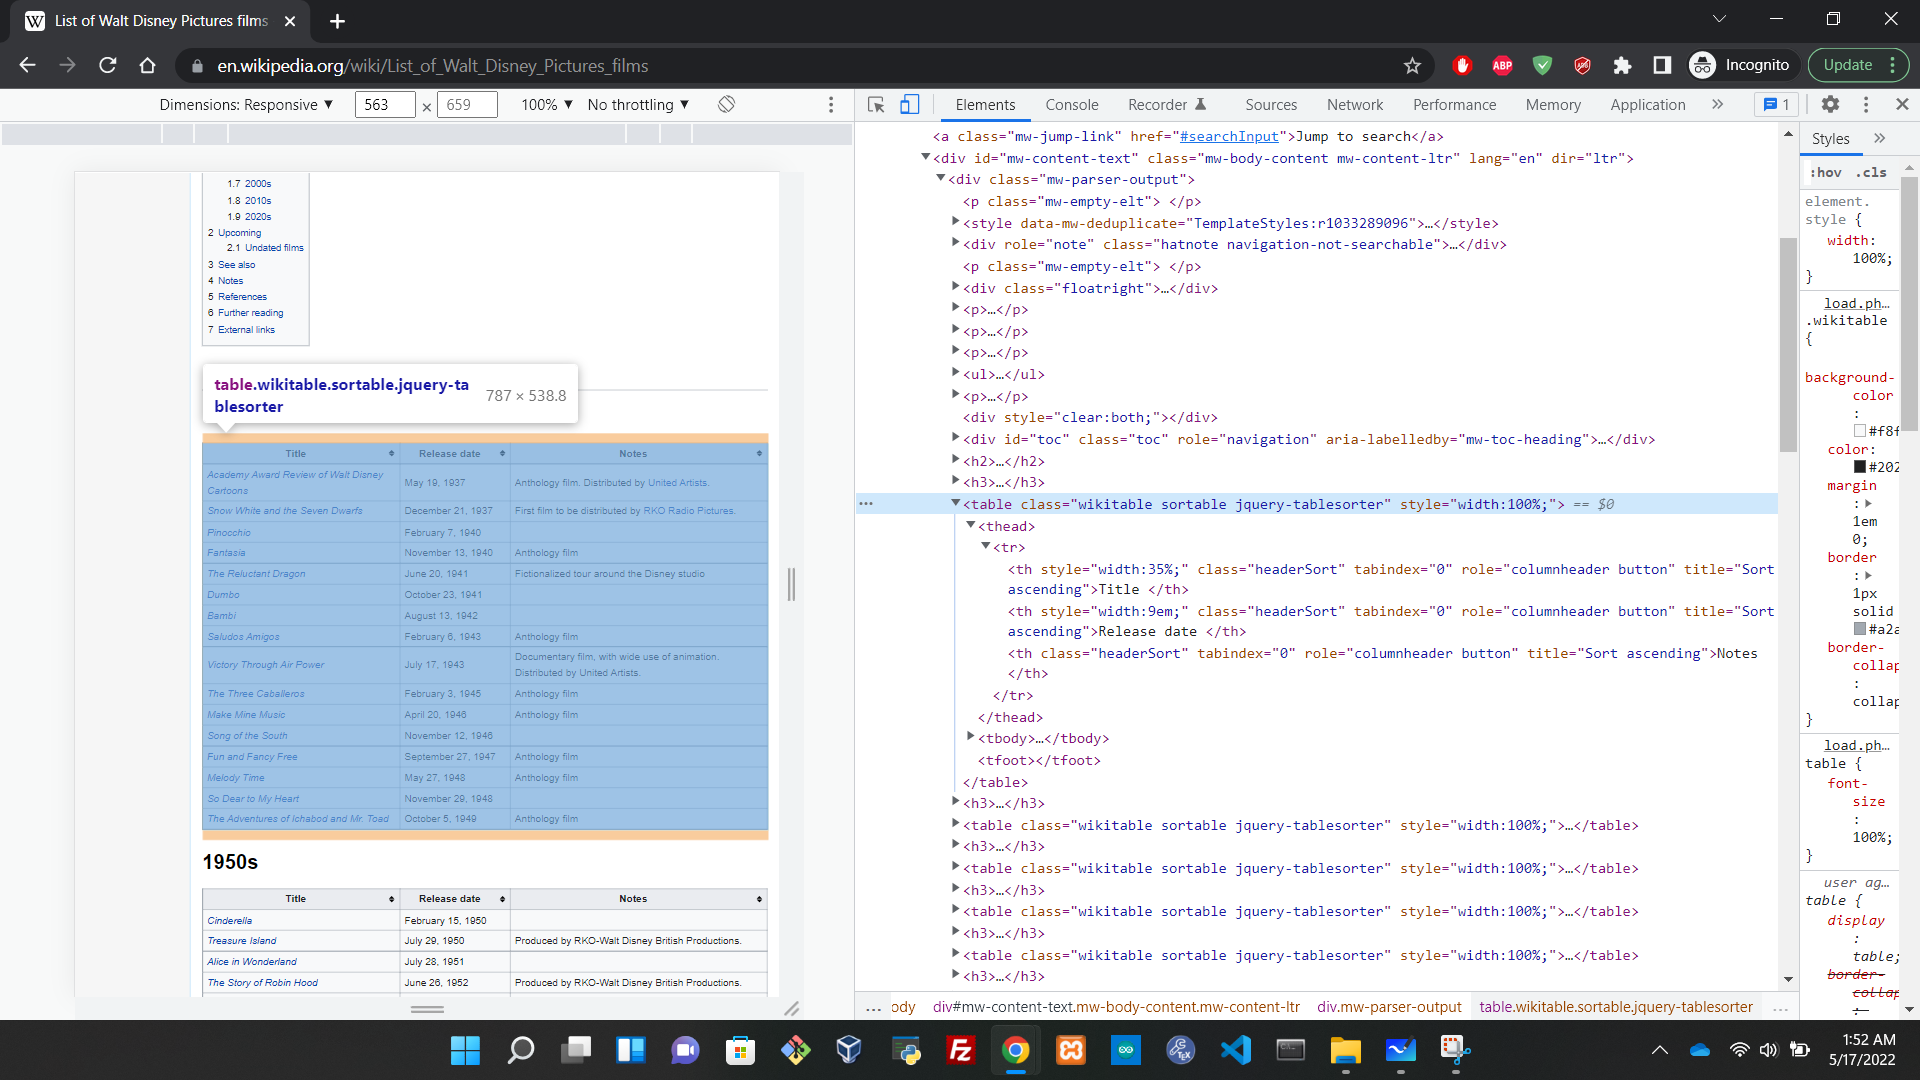

In [44]:
# The link for the movie was italized. So it was easier to grab the italics 
# using the i keyword

listofMovieLinks = sp.select(".wikitable.sortable i a")
#This gives us all the reference links of the movie from which we can then 
#extract the info vbox corresponsing to the movie.

#listofMovieLinks[0:7]

#Extracting a single link

print(listofMovieLinks[1]['href'])


/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)


## 5.1 Extracting link elements and info box of every movie

In [45]:


def getAllMoviesContentsValue(rowData):
  if rowData.find("li"):
    return [li.get_text(" ", strip =True).replace("\xa0", " ") for li in rowData.find_all("li")]
  else:
    return rowData.get_text(" ", strip = True)



def get_info_box(url):

  r = requests.get(url)
  soup = bs(r.content)
  info_box = soup.find(class_="infobox vevent")
  info_rows = info_box.find_all("tr")
  movieInfo = {}

  for idx, row in enumerate(info_rows):

      #First row
   if idx == 0:
    movieInfo['Title'] = row.find("th").get_text()

      #Second row
   elif idx ==1:
    continue # not storing this value in the dictionary

      #Remaining
   else:
    contentsKey = row.find("th").get_text(" ", strip = True)
    contentsValue = getAllMoviesContentsValue(row.find("td"))
    movieInfo[contentsKey] = contentsValue


  return movieInfo
      

In [46]:
#Testing out the function for frozen 
testurl = "https://en.wikipedia.org/wiki/Frozen_(2013_film)"
get_info_box(testurl)

{'Box office': '$1.280 billion [4]',
 'Budget': '$150 million [3] [4]',
 'Cinematography': 'Mohit Kallianpur',
 'Country': 'United States',
 'Directed by': ['Chris Buck', 'Jennifer Lee'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Edited by': 'Jeff Draheim',
 'Language': 'English',
 'Layouts by': 'Scott Beattie',
 'Music by': ['Christophe Beck (score)',
  'Robert Lopez (songs)',
  'Kristen Anderson-Lopez (songs)'],
 'Produced by': 'Peter Del Vecho',
 'Production companies': ['Walt Disney Pictures',
  'Walt Disney Animation Studios'],
 'Release dates': ['November 19, 2013 ( 2013-11-19 ) ( El Capitan Theatre )',
  'November 22, 2013 ( 2013-11-22 ) (United States) [1]'],
 'Running time': '102 minutes [2]',
 'Screenplay by': 'Jennifer Lee',
 'Starring': ['Kristen Bell',
  'Idina Menzel',
  'Jonathan Groff',
  'Josh Gad',
  'Santino Fontana'],
 'Story by': ['Chris Buck', 'Jennifer Lee', 'Shane Morris'],
 'Title': 'Frozen'}

## 5.2 Building the final dictionary 

In [47]:
disneyPage = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")
soup = bs(disneyPage.content)
movies = soup.select(".wikitable.sortable i a")

print(len(movies))
#print(movies[0])
rootPath = "https://en.wikipedia.org/"

allMoviesInfo = []
for idx, movie in enumerate(movies):
    
    try:
      relativePath = movie['href']
      #print(relative_path)
      fullPath = rootPath + relativePath
      #print(full_path)
      title = movie['title']
      #print(title)

      allMoviesInfo.append(get_info_box(fullPath))

      #print(movie)
            
    except Exception as e:
      print(movie.get_text())
      print(e)
     
    

# Some movies don't have a wikiepedia link reference or could not
# be retrieved. So, I am skipping those.

536
Zorro the Avenger
'NoneType' object has no attribute 'find'
The Sign of Zorro
'NoneType' object has no attribute 'find'
Spirited Away
'NoneType' object has no attribute 'get_text'
Howl's Moving Castle
'NoneType' object has no attribute 'get_text'
The Nightmare Before Christmas 3D
'NoneType' object has no attribute 'get_text'
The Secret of the Magic Gourd
'NoneType' object has no attribute 'get_text'
Ponyo
'NoneType' object has no attribute 'get_text'
Tales from Earthsea
'NoneType' object has no attribute 'get_text'
Anaganaga O Dheerudu
'NoneType' object has no attribute 'get_text'
The Secret World of Arrietty
'NoneType' object has no attribute 'get_text'
The Good Dinosaur
'NoneType' object has no attribute 'get_text'
Tini: The Movie
'NoneType' object has no attribute 'get_text'
Born in China
'NoneType' object has no attribute 'get_text'
The Beatles: Get Back – The Rooftop Concert
'NoneType' object has no attribute 'find'
Elemental
'NoneType' object has no attribute 'find_all'
61
'N

In [48]:
len(allMoviesInfo)

510

In [49]:
#Taking a look at a sample infobox
allMoviesInfo[1]

{'Based on': 'Snow White by The Brothers Grimm',
 'Box office': '$418 million [2]',
 'Budget': '$1.49 million [1]',
 'Country': 'United States',
 'Directed by': ['David Hand',
  'William Cottrell',
  'Wilfred Jackson',
  'Larry Morey',
  'Perce Pearce',
  'Ben Sharpsteen'],
 'Distributed by': 'RKO Radio Pictures',
 'Language': 'English',
 'Music by': ['Frank Churchill', 'Paul Smith', 'Leigh Harline'],
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release dates': ['December 21, 1937 ( 1937-12-21 ) ( Carthay Circle Theatre )',
  'February 4, 1938 ( 1938-02-04 ) (United States)'],
 'Running time': '83 minutes',
 'Starring': ['Adriana Caselotti',
  'Lucille La Verne',
  'Harry Stockwell',
  'Roy Atwell',
  'Pinto Colvig',
  'Otis Harlan',
  'Scotty Mattraw',
  'Billy Gilbert',
  'Eddie Collins',
  'Moroni Olsen',
  'Stuart Buchanan'],
 'Title': 'Snow White and the Seven Dwarfs',
 'Written by': ['Ted Sears',
  'Richard Creedon',
  'Otto Englander',
  'Di

## 5.3 Saving Movie Data

In [50]:
def saveData(title, data):
  with open(title, 'w', encoding='utf-8') as f:
    json.dump(data,f, ensure_ascii= False, indent=2)

def loadData(title):
  with open(title, encoding = 'utf-8') as f:
    return json.load(f)


In [51]:
saveData('disneyMoviesData.json', allMoviesInfo)

#6.Cleaning JSON data

 To do:
* Clean up references [1] [2] (superscript tags)
* Convert running time of movies into integer
* Convert dates into python datetime object
* Remove double values in release date
* Split up longer strings
* Convert budget and box office to numbers
* Try to fix exception errors

To see how the data was cleaned, I will be reusing code blocks from above and make changes according to clean out the data\\

In [55]:
get_info_box("https://en.wikipedia.org/wiki/Peter_Pan_(1953_film)")

{'Based on': ['Peter and Wendy', 'by', 'J. M. Barrie'],
 'Box office': '$87.4 million (United States and Canada)',
 'Budget': '$4 million',
 'Country': 'United States',
 'Directed by': ['Clyde Geronimi', 'Wilfred Jackson', 'Hamilton Luske'],
 'Distributed by': 'RKO Radio Pictures',
 'Language': 'English',
 'Music by': 'Oliver Wallace',
 'Narrated by': 'Tom Conway',
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date': ['February 5, 1953 (United States)'],
 'Running time': '77 minutes',
 'Starring': ['Bobby Driscoll',
  'Kathryn Beaumont',
  'Hans Conried',
  'Paul Collins'],
 'Story by': ['Milt Banta',
  'Bill Cottrell',
  'Winston Hibler',
  'Bill Peet',
  'Erdman Penner',
  'Joe Rinaldi',
  'Ted Sears',
  'Ralph Wright'],
 'Title': 'Peter Pan'}

In [65]:


#function to clean the superscript tags in reference 

def cleanHtmlTags(soup):
  for tag in soup.find_all(["sup", "span"]):
    tag.decompose()

def getAllMoviesContentsValue(rowData):
  if rowData.find("li"):
    return [li.get_text(" ", strip =True).replace("\xa0", " ") for li in rowData.find_all("li")]

  elif rowData.find("br"):
    return [text for text in rowData.stripped_strings]
  else:
    return rowData.get_text(" ", strip = True).replace("\xa0", " ")



def get_info_box(url):

  r = requests.get(url)
  soup = bs(r.content)
  info_box = soup.find(class_="infobox vevent")
  info_rows = info_box.find_all("tr")

  cleanHtmlTags(soup)
  movieInfo = {}

  for idx, row in enumerate(info_rows):

      #First row
   if idx == 0:
    movieInfo['Title'] = row.find("th").get_text()

   else:
    header = row.find("th")
      #Remaining
    if header:
      contentsKey = row.find("th").get_text(" ", strip = True)
      contentsValue = getAllMoviesContentsValue(row.find("td"))
      movieInfo[contentsKey] = contentsValue


  return movieInfo
      

Let's see if adding the custom function removes the superscript tags and the span tag in the release date from PeterPan's infobox data.

Also so info box has the Starring value not as a list. So, we change that too.


In [64]:
get_info_box("https://en.wikipedia.org/wiki/Davy_Crockett_and_the_River_Pirates")
#get_info_box("https://en.wikipedia.org/wiki/One_Little_Indian_(film)")

{'Country': 'United States',
 'Directed by': 'Norman Foster',
 'Distributed by': 'Buena Vista Film Distribution Co., Inc.',
 'Edited by': 'Stanley Johnson',
 'Language': 'English',
 'Music by': ['Thomas W. Blackburn (lyrics)',
  'George Bruns',
  'Edward H. Plumb (orchestration)'],
 'Produced by': 'Bill Walsh',
 'Production company': 'Walt Disney Productions',
 'Release date': 'July 18, 1956',
 'Running time': '81 minutes',
 'Starring': ['Fess Parker', 'Buddy Ebsen', 'Jeff York'],
 'Title': 'Davy Crockett and the River Pirates',
 'Written by': ['Tom Blackburn', 'Norman Foster']}

Examining some of the movies that threw exception gave me the following information:

* Some movies do not have a full info box
* Some movies have a different value at index 0    
* Some movies have a differnt info box
* Some refernce links lead to another differnet page

I did not use such movies to build the dataset as it was a bit diificult to clean those edge cases. 

## 6.1 Creating the cleaned dictionary

In [66]:
disneyPage = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")
soup = bs(disneyPage.content)
movies = soup.select(".wikitable.sortable i a")

print(len(movies))
#print(movies[0])
rootPath = "https://en.wikipedia.org/"

allMoviesInfo = []
for idx, movie in enumerate(movies):
    
    try:
      relativePath = movie['href']
      #print(relative_path)
      fullPath = rootPath + relativePath
      #print(full_path)
      title = movie['title']
      #print(title)

      allMoviesInfo.append(get_info_box(fullPath))

      #print(movie)
            
    except Exception as e:
      print(movie.get_text())
      print(e)
     
    

# Some movies don't have a wikiepedia link reference or could not
# be retrieved. So, I am skipping those.

536
Zorro the Avenger
'NoneType' object has no attribute 'find'
The Sign of Zorro
'NoneType' object has no attribute 'find'
The Beatles: Get Back – The Rooftop Concert
'NoneType' object has no attribute 'find'
Elemental
'NoneType' object has no attribute 'find_all'
61
'NoneType' object has no attribute 'find_all'
All Night Long
'NoneType' object has no attribute 'find'
Keeper of the Lost Cities
'NoneType' object has no attribute 'find_all'
Muppet Man
'NoneType' object has no attribute 'find_all'
Sister Act 3
'NoneType' object has no attribute 'find'
The Thief
'NoneType' object has no attribute 'find_all'
Tom Sawyer
'NoneType' object has no attribute 'find_all'
Tower of Terror
'NoneType' object has no attribute 'find_all'
Tron: Ares
'NoneType' object has no attribute 'find'
FC Barcelona
'NoneType' object has no attribute 'find_all'
Young Woman and the Sea
'NoneType' object has no attribute 'find_all'


In [67]:
len(allMoviesInfo)

521

In [68]:
# So I was not able to scrape data for the 15 movies.

##6.2 Saving the cleaned data

In [69]:
saveData('disneyMoviesData_cleaned.json', allMoviesInfo)

#6. More cleaning on the json data

To do:
* ~~Clean up references [1] [2] (superscript tags)~~
* ~~Convert running time of movies into integer~~
* ~~Convert dates into python datetime object~~
* ~~Remove double values in release date~~
* ~~Split up longer strings~~
* ~~Convert budget and box office to numbers~~
* ~~Try to fix exception errors~~

In [70]:
movieList = loadData("disneyMoviesData_cleaned.json")

In [72]:
movieList[:2]

[{'Box office': '$45.472',
  'Country': 'United States',
  'Distributed by': 'United Artists',
  'Language': 'English',
  'Production company': 'Walt Disney Productions',
  'Release date': ['May 19, 1937'],
  'Running time': '41 minutes (74 minutes 1966 release)',
  'Title': 'Academy Award Review of '},
 {'Based on': ['Snow White', 'by The', 'Brothers Grimm'],
  'Box office': '$418 million',
  'Budget': '$1.49 million',
  'Country': 'United States',
  'Directed by': ['David Hand',
   'William Cottrell',
   'Wilfred Jackson',
   'Larry Morey',
   'Perce Pearce',
   'Ben Sharpsteen'],
  'Distributed by': 'RKO Radio Pictures',
  'Language': 'English',
  'Music by': ['Frank Churchill', 'Paul Smith', 'Leigh Harline'],
  'Produced by': 'Walt Disney',
  'Production company': 'Walt Disney Productions',
  'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
   'February 4, 1938 (United States)'],
  'Running time': '83 minutes',
  'Starring': ['Adriana Caselotti',
   'Lucille La Ver

## 6.1 Change running times to integers

In [74]:
[itr.get("Running time", "N/A") for itr in movieList]

['41 minutes (74 minutes 1966 release)',
 '83 minutes',
 '88 minutes',
 '126 minutes',
 '74 minutes',
 '64 minutes',
 '70 minutes',
 '42 minutes',
 '70 min',
 '71 minutes',
 '75 minutes',
 '94 minutes',
 '73 minutes',
 '75 minutes',
 '82 minutes',
 '68 minutes',
 '74 minutes',
 '96 minutes',
 '75 minutes',
 '84 minutes',
 '77 minutes',
 '92 minutes',
 '69 minutes',
 '81 minutes',
 ['60 minutes (VHS version)', '71 minutes (original)'],
 '127 minutes',
 '93 minutes',
 '76 minutes',
 '75 minutes',
 '73 minutes',
 '85 minutes',
 '81 minutes',
 '70 minutes',
 '90 min.',
 '80 minutes',
 '75 minutes',
 '83 minutes',
 '83 minutes',
 '72 minutes',
 '97 minutes',
 '75 minutes',
 '104 minutes',
 '93 minutes',
 '105 minutes',
 '95 minutes',
 '97 minutes',
 '134 minutes',
 '69 minutes',
 '92 minutes',
 '126 minutes',
 '79 minutes',
 '97 minutes',
 '128 minutes',
 '73 minutes',
 '91 minutes',
 '105 minutes',
 '98 minutes',
 '130 minutes',
 '89 minutes',
 '93 minutes',
 '67 minutes',
 '98 minutes',
 

In [81]:

#85 mins
#85 min
# split at whitespave
# for running time having a range in a list, take the first value
def changeMinsToInt(runningTime):
  if runningTime == 'N/A':
    return None

  if isinstance(runningTime, list):
    time = runningTime[0]
    intValue = int(time.split(" ")[0])
    return intValue

  else:
    intValue = int(runningTime.split(" ")[0])
    return intValue

for movie in movieList:
  movie['Running time (mins)'] = changeMinsToInt(movie.get('Running time', 'N/A'))



In [84]:
print([itr.get("Running time (mins)", "N/A") for itr in movieList])

[41, 83, 88, 126, 74, 64, 70, 42, 70, 71, 75, 94, 73, 75, 82, 68, 74, 96, 75, 84, 77, 92, 69, 81, 60, 127, 93, 76, 75, 73, 85, 81, 70, 90, 80, 75, 83, 83, 72, 97, 75, 104, 93, 105, 95, 97, 134, 69, 92, 126, 79, 97, 128, 73, 91, 105, 98, 130, 89, 93, 67, 98, 100, 118, 103, 110, 80, 74, 91, 91, 97, 118, 139, 131, 92, 87, 116, 93, 110, 110, 131, 101, 108, 84, 78, 75, 164, 106, 110, 99, 113, 108, 102, 85, 91, 93, 100, 100, 79, 96, 113, 89, 117, 92, 88, 92, 87, 93, 93, 93, 90, 83, 96, 88, 89, 91, 93, 92, 97, 100, 100, 89, None, 91, 112, 115, 95, 91, 97, 104, 74, 48, 77, 104, 128, 101, 94, 104, 90, 100, 88, 93, 98, 112, 84, 97, 97, 114, 96, 97, 109, 83, 90, 107, 96, 103, 91, 95, 105, 113, 80, 101, 90, 74, 90, 89, 110, 74, 93, 84, 83, 74, 77, 107, 93, 88, 108, 84, 121, 89, 104, 90, 86, 84, 108, 107, 96, 98, 105, 108, 94, 106, 102, 88, 102, 102, 97, 111, 100, 96, 98, 78, 81, 108, 89, 99, 89, 81, 92, 100, 89, 79, 91, 101, 104, 103, 86, 105, 74, 93, 92, 98, 95, 93, 87, 93, 87, 128, 77, 86, 95, 1

In [85]:
print([movie.get("Budget", "N/A") for movie in movieList])

['N/A', '$1.49 million', '$2.6 million', '$2.28 million', '$600,000', '$950,000', '$858,000', 'N/A', '$788,000', 'N/A', '$1.35 million', '$2.125 million', 'N/A', '$1.5 million', '$1.5 million', 'N/A', '$2.2 million', '$1,800,000', '$3 million', 'N/A', '$4 million', '$2 million', '$300,000', '$1.8 million', 'N/A', '$5 million', 'N/A', '$4 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$700,000', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$6 million', 'under $1 million or $1,250,000', 'N/A', '$2 million', 'N/A', 'N/A', '$2.5 million', 'N/A', 'N/A', '$4 million', '$3.6 million', 'N/A', 'N/A', 'N/A', 'N/A', '$3 million', 'N/A', '$3 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$3 million', 'N/A', 'N/A', 'N/A', 'N/A', '$4.4–6 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$4 million', 'N/A', '$5 million', 'N/A', 'N/A', 'N/A', 'N/A', '$5 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$4 million', 'N/A', 'N/A', 'N/A', '

## 6.2 Budget and Box office filtering using regex

In [100]:

#Regular expression
import re

quantity = r"thousand|million|billion"

number = r"\d+(,\d{3})*\.*\d*"
standard = fr"\${number}(-|\sto\s|–)?({number})?\s({quantity})"

'''
    *  $790 million : word syntax
    *  $12,000      : value syntax
'''

def moneyWord2Value(word):
	quantityValues = {"thousand": 1000, "million": 1000000, "billion": 1000000000}
	return quantityValues.get(word.lower(), 1)

def parseWordSyntax(string):
	replaceString = string.replace(",", "")
	value = float(re.search(number, replaceString).group())
	modifier = moneyWord2Value(re.search(quantity, string, flags=re.I).group())
	return value*modifier

def parseValueSyntax(string):
	replaceString = string.replace(",", "")
	return float(re.search(number, replaceString).group())

def moneyConversion(money):

    # check if type is a list
	if type(money) == list:
		money = money[0]

	word_syntax = re.search(standard, money, flags=re.I)
	value_syntax = re.search(fr"\${number}", money)

	if word_syntax:
		return parseWordSyntax(word_syntax.group())
	elif value_syntax:
		return parseValueSyntax(value_syntax.group())
	else:
		return None

print(moneyConversion("$620 Millions"))

620000000.0


In [101]:
#Adding new filtered key value pairs for budget and box office
for movie in movieList:
  movie['Budget (float)'] = moneyConversion(movie.get('Budget', 'N/A'))
  movie['Box office (float)'] = moneyConversion(movie.get('Box office', 'N/A'))


In [103]:
#moneyConversion(str(allMoviesInfo[10]['Budget']))
allMoviesInfo[0]

{'Box office': '$45.472',
 'Country': 'United States',
 'Distributed by': 'United Artists',
 'Language': 'English',
 'Production company': 'Walt Disney Productions',
 'Release date': ['May 19, 1937'],
 'Running time': '41 minutes (74 minutes 1966 release)',
 'Title': 'Academy Award Review of '}

## 6.3 Convert dates into datime objects

In [105]:
allMoviesInfo[50]

#Format Month Day, Year

{'Based on': ['The Hundred and One Dalmatians', 'by', 'Dodie Smith'],
 'Box office': '$303 million',
 'Budget': '$3.6 million',
 'Country': 'United States',
 'Directed by': ['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang Reitherman'],
 'Distributed by': 'Buena Vista Distribution',
 'Edited by': ['Roy M. Brewer, Jr.', 'Donald Halliday'],
 'Language': 'English',
 'Music by': 'George Bruns',
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date': ['January 25, 1961'],
 'Running time': '79 minutes',
 'Starring': ['Rod Taylor',
  'Cate Bauer',
  'Betty Lou Gerson',
  'Ben Wright',
  'Bill Lee (singing voice)',
  'Lisa Davis',
  'Martha Wentworth'],
 'Story by': 'Bill Peet',
 'Title': '101 Dalmatians'}

In [106]:
[movie.get("Release date", "N/A") for movie in movieList]

[['May 19, 1937'],
 'N/A',
 'N/A',
 ['November 13, 1940'],
 ['June 27, 1941'],
 'N/A',
 'N/A',
 'N/A',
 ['July 17, 1943'],
 'N/A',
 'N/A',
 'N/A',
 ['September 27, 1947'],
 'May 27, 1948',
 'N/A',
 ['October 5, 1949'],
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 ['February 5, 1953 (United States)'],
 ['July 23, 1953 (US)'],
 ['November 10, 1953'],
 'N/A',
 ['August 17, 1954'],
 ['December 23, 1954'],
 'May 25, 1955',
 ['June 22, 1955'],
 ['September 14, 1955'],
 'December 22, 1955',
 'June 8, 1956',
 'July 18, 1956',
 ['September 4, 1956'],
 ['December 20, 1956'],
 'June 19, 1957',
 'August 28, 1957',
 ['December 25, 1957'],
 ['July 8, 1958'],
 ['August 12, 1958'],
 ['December 25, 1958'],
 ['January 29, 1959'],
 ['March 19, 1959'],
 'N/A',
 ['November 10, 1959'],
 'January 21, 1960 ( Sarasota, FL )',
 ['February 24, 1960'],
 'May 19, 1960',
 'N/A',
 ['November 1, 1960'],
 ['December 21, 1960'],
 ['January 25, 1961'],
 'March 16, 1961',
 ['June 21, 1961'],
 ['July 12, 1961'],
 ['July 17, 1961'],
 

In [ ]:
# June 28, 1950
from datetime import datetime

dates = [movie.get('Release date', 'N/A') for movie in allMoviesInfo]

def clean_date(date):
    return date.split("(")[0].strip()

def date_conversion(date):
    if isinstance(date, list):
        date = date[0]
        
    if date == "N/A":
        return None
        
    date_str = clean_date(date)
    print(date_str)

    fmts = ["%B %d, %Y", "%d %B %Y"]
    for fmt in fmts:
        try:
            return datetime.strptime(date_str, fmt)
        except Exception as e:
            print("Exceptions")
            print(e)
    return None

for date in dates:
  print(date_conversion(date))
  print()

  #output hidden due to large volume

In [262]:
date_conversion(['October 23, 1941 (New York City)','October 31, 1941 (U.S.)'])

October 23, 1941


datetime.datetime(1941, 10, 23, 0, 0)

In [263]:
#using python datetime libaray

for movie in allMoviesInfo:
    movie['Release date (datetime)'] = date_conversion(movie.get('Release date', 'N/A'))



May 19, 1937
November 13, 1940
June 27, 1941
July 17, 1943
September 27, 1947
May 27, 1948
October 5, 1949
February 5, 1953
July 23, 1953
November 10, 1953
August 17, 1954
December 23, 1954
May 25, 1955
June 22, 1955
September 14, 1955
December 22, 1955
June 8, 1956
July 18, 1956
September 4, 1956
December 20, 1956
June 19, 1957
August 28, 1957
December 25, 1957
July 8, 1958
August 12, 1958
December 25, 1958
January 29, 1959
March 19, 1959
November 10, 1959
January 21, 1960
February 24, 1960
May 19, 1960
November 1, 1960
December 21, 1960
January 25, 1961
March 16, 1961
June 21, 1961
July 12, 1961
July 17, 1961
December 14, 1961
April 5, 1962
May 17, 1962
June 6, 1962
September 26, 1962
November 7, 1962
January 16, 1963
March 29, 1963
June 1, 1963
July 7, 1963
November 20, 1963
December 25, 1963
March 12, 1964
February 11, 1964
July 2, 1964
November 10, 1964
December 18, 1964
August 18, 1965
December 2, 1965
October 1, 1966
December 1, 1966
February 8, 1967
June 15, 1967
July 12, 1967


In [264]:
allMoviesInfo[50]

{'Based on': ['The Hundred and One Dalmatians', 'by', 'Dodie Smith'],
 'Box office': '$303 million',
 'Budget': '$3.6 million',
 'Country': 'United States',
 'Directed by': ['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang Reitherman'],
 'Distributed by': 'Buena Vista Distribution',
 'Edited by': ['Roy M. Brewer, Jr.', 'Donald Halliday'],
 'IMDB Id': 'tt0115433',
 'IMDB Rating': '5.7',
 'Language': 'English',
 'Metasscore': '49',
 'Music by': 'George Bruns',
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date': ['January 25, 1961'],
 'Release date (datetime)': datetime.datetime(1961, 1, 25, 0, 0),
 'Rotten Tomatoes Rating': '41%',
 'Running time': '79 minutes',
 'Starring': ['Rod Taylor',
  'Cate Bauer',
  'Betty Lou Gerson',
  'Ben Wright',
  'Bill Lee (singing voice)',
  'Lisa Davis',
  'Martha Wentworth'],
 'Story by': 'Bill Peet',
 'Title': '101 Dalmatians'}

In [268]:
import pickle

def saveAsPickleData(name, data):
  with open(name, 'wb') as f:
    pickle.dump(data,f)

def loadPickleData(name):
  with open(name, 'rb') as f:
    return pickle.load(f)

def saveAsYAMLData(name, data):
  with open(name, 'w') as f:
    yaml.dump(data,f,default_flow_style=False)

def loadYAMLData(name):
  with open(name, 'r') as f:
    return yaml.safe_load(f)





In [269]:
saveAsPickleData("disneyMovieData_cleaned_v2.pickle", allMoviesInfo)
saveAsYAMLData("disneyMovieData_cleaned_v2.yaml", allMoviesInfo)

In [270]:
pData = loadPickleData("disneyMovieData_cleaned_v2.pickle")

In [271]:
pData[1]

{'Based on': ['Snow White', 'by The', 'Brothers Grimm'],
 'Box office': '$418 million',
 'Budget': '$1.49 million',
 'Country': 'United States',
 'Directed by': ['David Hand',
  'William Cottrell',
  'Wilfred Jackson',
  'Larry Morey',
  'Perce Pearce',
  'Ben Sharpsteen'],
 'Distributed by': 'RKO Radio Pictures',
 'IMDB Id': 'tt0029583',
 'IMDB Rating': '7.6',
 'Language': 'English',
 'Metasscore': '95',
 'Music by': ['Frank Churchill', 'Paul Smith', 'Leigh Harline'],
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date (datetime)': None,
 'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
  'February 4, 1938 (United States)'],
 'Rotten Tomatoes Rating': None,
 'Running time': '83 minutes',
 'Starring': ['Adriana Caselotti',
  'Lucille La Verne',
  'Harry Stockwell',
  'Roy Atwell',
  'Pinto Colvig',
  'Otis Harlan',
  'Scotty Mattraw',
  'Billy Gilbert',
  'Eddie Collins',
  'Moroni Olsen',
  'Stuart Buchanan'],
 'Title': 'Sno

#7.Attaching IMDB/Rotten Tomatoes Ratings/Metascores to movies

In [292]:
#@title

API_KEY = "140fa60f"

In [293]:
import urllib
import requests
import yaml



#OMDb API
#You'll need to use your own API key.
def getOmdb_Data(title):
   
    rootPath = f"http://www.omdbapi.com/?apikey={API_KEY}&t="

    fullPath = rootPath +title
    #print(fullPath)

    #make GET requests to the OMDb API and get the response as JSON object

    return requests.get(fullPath).json()

def getRottenTomatoesScore(omdbInfo):
    ratings = omdbInfo.get('Ratings', []) #go to Ratings filed

    for rating in ratings:   #inside Ratings list, go where source is rotten tomatoes
      if rating['Source'] == 'Rotten Tomatoes': 
          return rating['Value']  # grab the score from rotten tomatoes
    return None
    



In [274]:
info = getOmdb_Data('Soul')
print(yaml.dump(info))
print(getRottenTomatoesScore(info))

Actors: Jamie Foxx, Tina Fey, Graham Norton
Awards: Won 2 Oscars. 121 wins & 93 nominations total
BoxOffice: N/A
Country: United States
DVD: 25 Dec 2020
Director: Pete Docter, Kemp Powers
Genre: Animation, Adventure, Comedy
Language: English, Korean, Inuktitut
Metascore: '83'
Plot: After landing the gig of a lifetime, a New York jazz pianist suddenly finds
  himself trapped in a strange land between Earth and the afterlife.
Poster: https://m.media-amazon.com/images/M/MV5BZGE1MDg5M2MtNTkyZS00MTY5LTg1YzUtZTlhZmM1Y2EwNmFmXkEyXkFqcGdeQXVyNjA3OTI0MDc@._V1_SX300.jpg
Production: N/A
Rated: PG
Ratings:
- {Source: Internet Movie Database, Value: 8.0/10}
- {Source: Rotten Tomatoes, Value: 95%}
- {Source: Metacritic, Value: 83/100}
Released: 25 Dec 2020
Response: 'True'
Runtime: 100 min
Title: Soul
Type: movie
Website: N/A
Writer: Pete Docter, Mike Jones, Kemp Powers
Year: '2020'
imdbID: tt2948372
imdbRating: '8.0'
imdbVotes: 309,287

95%


## 7.1 Adding IMDB Id, IMDB Ratings, Metascore, and Rotten Tomatoes Rating

In [275]:
import pprint
for movie in allMoviesInfo:
    title = movie['Title']
    omdbInfo = getOmdb_Data(title)
    movie['IMDB Id']    = omdbInfo.get('imdbID',None)
    movie['IMDB Rating'] = omdbInfo.get('imdbRating', None)
    movie['Metasscore'] = omdbInfo.get('Metascore', None)
    movie['Rotten Tomatoes Rating'] = getRottenTomatoesScore(omdbInfo)

    

In [276]:

print(yaml.dump(allMoviesInfo[55]))

Based on: [Babes in Toyland, by, Victor Herbert, and, Glen MacDonough]
Box office: $4.6 million (U.S./Canada rentals)
Budget: $3 million
Cinematography: Edward Colman
Country: United States
Directed by: Jack Donohue
Distributed by: Buena Vista Distribution
Edited by: Robert Stafford
IMDB Id: tt0054649
IMDB Rating: '6.1'
Language: English
Metasscore: '55'
Music by: [Victor Herbert, George Bruns, Mel Leven (new lyrics)]
Produced by: Walt Disney
Production company: Walt Disney Productions
Release date: ['December 14, 1961']
Release date (datetime): 1961-12-14 00:00:00
Rotten Tomatoes Rating: 36%
Running time: 105 minutes
Screenplay by: [Lowell S. Hawley, Ward Kimball, Joe Rinaldi]
Starring: [Ray Bolger, Tommy Sands, Annette Funicello, Ed Wynn]
Title: Babes in Toyland



In [277]:
allMoviesInfo[5]

{'Based on': ['Dumbo, the Flying Elephant',
  'by',
  'Helen Aberson',
  'Harold Pearl'],
 'Box office': '>$1.3 million (est. United States/Canada rentals, 1941)',
 'Budget': '$950,000',
 'Country': 'United States',
 'Directed by': ['Ben Sharpsteen',
  'Norman Ferguson',
  'Wilfred Jackson',
  'Bill Roberts',
  'Jack Kinney',
  'Samuel Armstrong'],
 'Distributed by': 'RKO Radio Pictures',
 'IMDB Id': 'tt0033563',
 'IMDB Rating': '7.2',
 'Language': 'English',
 'Metasscore': '96',
 'Music by': ['Frank Churchill', 'Oliver Wallace'],
 'Narrated by': 'John McLeish',
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date (datetime)': None,
 'Release dates': ['October 23, 1941 (New York City)',
  'October 31, 1941 (U.S.)'],
 'Rotten Tomatoes Rating': '98%',
 'Running time': '64 minutes',
 'Starring': ['Edward Brophy',
  'Verna Felton',
  'Cliff Edwards',
  'Herman Bing',
  'Sterling Holloway',
  'Margaret Wright',
  'Hall Johnson Choir'],
 'Story by':

##7.2 Saving final data 

In [279]:
allMoviesInfo_copy = [movie.copy() for movie in allMoviesInfo]

for movie in allMoviesInfo_copy:
  currDate = movie['Release date (datetime)']
  if currDate:
    movie['Release date (datetime)'] = currDate.strftime("%B %d, %Y")
  else:
    movie['Release date (datetime)'] = None


In [282]:
allMoviesInfo_copy[20]

{'Based on': ['Peter and Wendy', 'by', 'J. M. Barrie'],
 'Box office': '$87.4 million (United States and Canada)',
 'Budget': '$4 million',
 'Country': 'United States',
 'Directed by': ['Clyde Geronimi', 'Wilfred Jackson', 'Hamilton Luske'],
 'Distributed by': 'RKO Radio Pictures',
 'IMDB Id': 'tt0046183',
 'IMDB Rating': '7.3',
 'Language': 'English',
 'Metasscore': '76',
 'Music by': 'Oliver Wallace',
 'Narrated by': 'Tom Conway',
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date': ['February 5, 1953 (United States)'],
 'Release date (datetime)': 'February 05, 1953',
 'Rotten Tomatoes Rating': '79%',
 'Running time': '77 minutes',
 'Starring': ['Bobby Driscoll',
  'Kathryn Beaumont',
  'Hans Conried',
  'Paul Collins'],
 'Story by': ['Milt Banta',
  'Bill Cottrell',
  'Winston Hibler',
  'Bill Peet',
  'Erdman Penner',
  'Joe Rinaldi',
  'Ted Sears',
  'Ralph Wright'],
 'Title': 'Peter Pan'}

In [283]:
##options to save data as pickle or yaml or csv

saveAsPickleData('disneyMoviesData_Final.pickle',allMoviesInfo)
saveAsYAMLData('disneyMoviesData_Final.yaml',allMoviesInfo)
saveData('disneyMoviesData_Final.json', allMoviesInfo_copy)

##7.3 Converting data to CSV

In [284]:
import pandas as pd

#the copy does not have the datetime object. Might use this for analysis purpose.
df = pd.DataFrame(allMoviesInfo)

In [285]:
df.head()

,Title,Production company,Distributed by,Release date,Running time,Country,Language,Box office,Release date (datetime),IMDB Id,...,Original concept by,Music,Lyrics,Book,Basis,Productions,Awards,Created by,Original work,Owner
0,Academy Award Review of,Walt Disney Productions,United Artists,"[May 19, 1937]",41 minutes (74 minutes 1966 release),United States,English,$45.472,1937-05-19,tt0263027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,RKO Radio Pictures,NaN,83 minutes,United States,English,$418 million,NaT,tt0029583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pinocchio,Walt Disney Productions,RKO Radio Pictures,NaN,88 minutes,United States,English,$164 million,NaT,tt0032910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fantasia,Walt Disney Productions,RKO Radio Pictures,"[November 13, 1940]",126 minutes,United States,English,$76.4–$83.3 million (United States and Canada),1940-11-13,tt0032455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Reluctant Dragon,Walt Disney Productions,RKO Radio Pictures,"[June 27, 1941]",74 minutes,United States,English,"$960,000 (worldwide rentals)",1941-06-27,tt0034091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df.to_csv('disneyMoviesData_Final.csv')

In [288]:
df.to_excel('disneyMoviesData_Final.xlsx')

In [289]:
!zip -r /content/Datasets.zip /content/Datasets

  adding: content/Datasets/ (stored 0%)
  adding: content/Datasets/disneyMovieData_cleaned_v2.yaml (deflated 78%)
  adding: content/Datasets/disneyMoviesData_Final.yaml (deflated 78%)
  adding: content/Datasets/disneyMoviesData_Final.csv (deflated 70%)
  adding: content/Datasets/disneyMoviesData.json (deflated 80%)
  adding: content/Datasets/disneyMoviesData_Final.xlsx (deflated 2%)
  adding: content/Datasets/disneyMoviesData_Final.json (deflated 82%)
  adding: content/Datasets/disneyMovieData_cleaned_v2.pickle (deflated 66%)
  adding: content/Datasets/disneyMoviesData_Final.pickle (deflated 66%)
  adding: content/Datasets/disneyMoviesData_cleaned.json (deflated 81%)


In [290]:
from google.colab import files

files.download("/content/Datasets.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>